### Staff Promotion Model

> **CASE STUDY: YAKUB TRADING GROUP ALGORITHMIC STAFF PROMOTION**

<img src = 'in.jpg'>

## Objectives:

+ Analyze the data and see the different variables that can affect an employees promotion
+ Build a predictive model to determine the employees that are likely to be promoted

## Exploratory Data Analysis

#### Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline       
print('All libraries imported')

All libraries imported


In [8]:
#setting up default parameters for chart size, font size of axes and labels, color, backround, making plot suitable for presentations.
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [9]:
#load the dataset
dataset = pd.read_csv('dataset.csv')
dataset.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


### Data Description and Exploratory Visualisations

In [11]:
#info on all columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        36633 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

In [12]:
#summary statistics
dataset.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


In [13]:
#displays all columns
dataset.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')

In [14]:
#displays data dimension
dataset.shape 

(38312, 19)

#### Checking for missing values in the data

In [16]:
#summing missing values
dataset.isnull().sum()
#only the qualification column has empty values

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [17]:
#check for the count of different groups in the Qualification column
dataset['Qualification'].value_counts()

Qualification
First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: count, dtype: int64

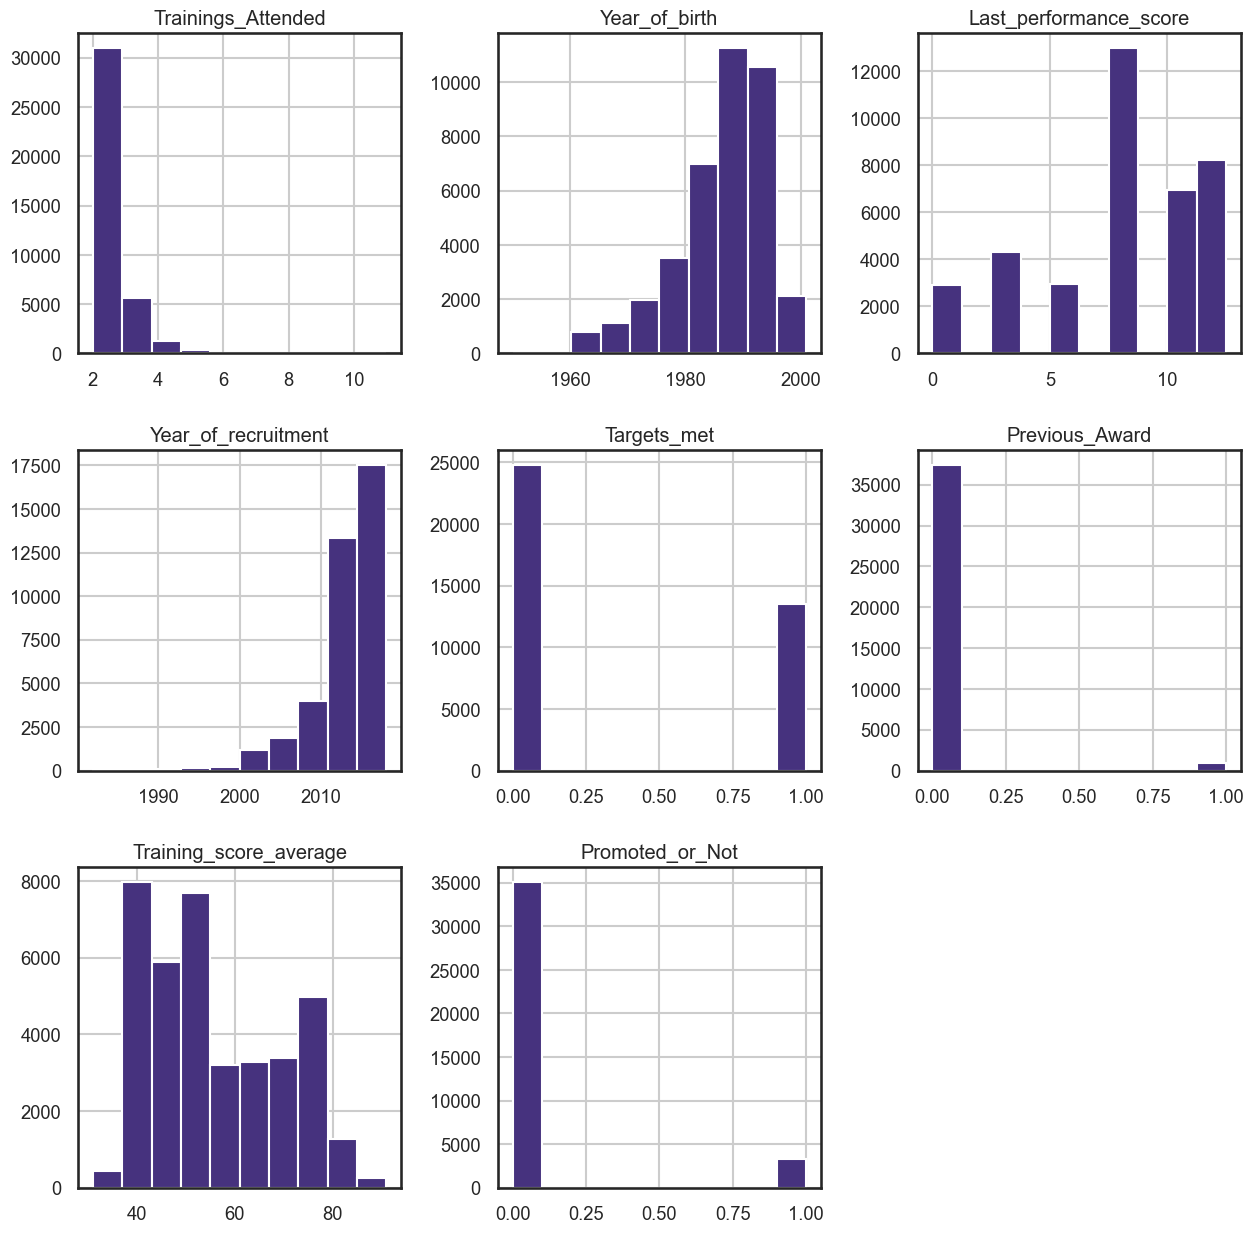

In [18]:
#visualising the distribution of the columns in the dataset
dataset.hist(figsize = (15,15))
plt.show()

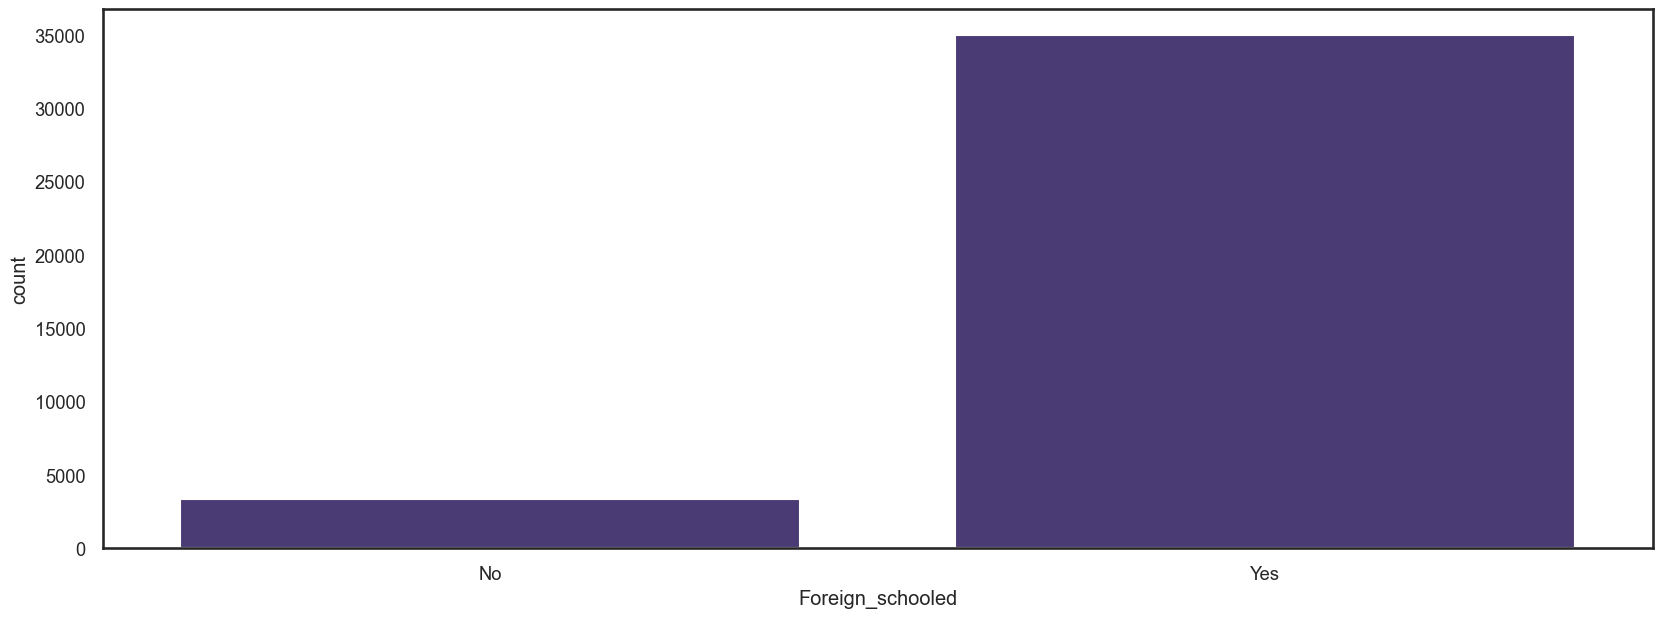

In [19]:
#visualizing the non-numeric columns
sns.countplot(x = 'Foreign_schooled', data=dataset)
plt.show()

In [20]:
dataset['Foreign_schooled'].value_counts()

Foreign_schooled
Yes    34995
No      3317
Name: count, dtype: int64

In [21]:
dataset['Past_Disciplinary_Action'].value_counts()

Past_Disciplinary_Action
No     38161
Yes      151
Name: count, dtype: int64

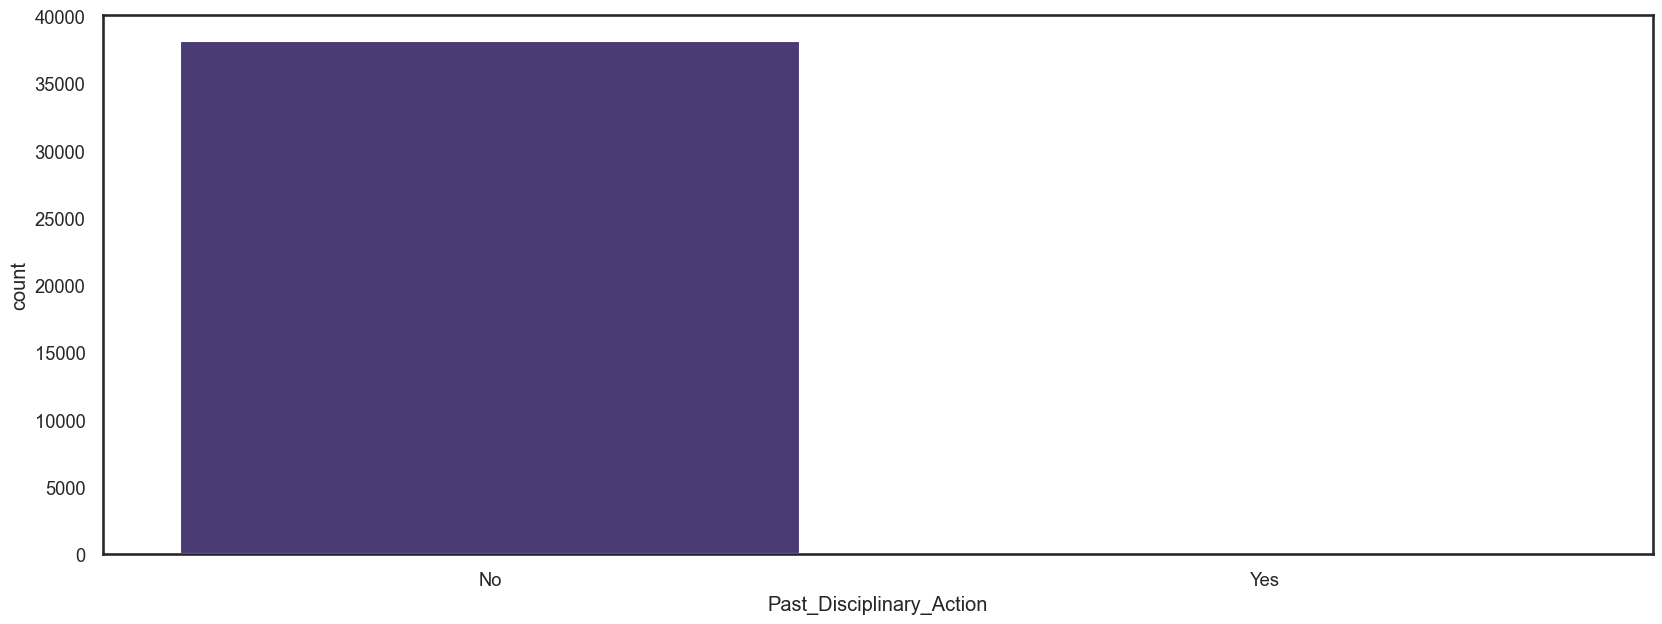

In [22]:
sns.countplot(x = 'Past_Disciplinary_Action', data = dataset)
plt.show()

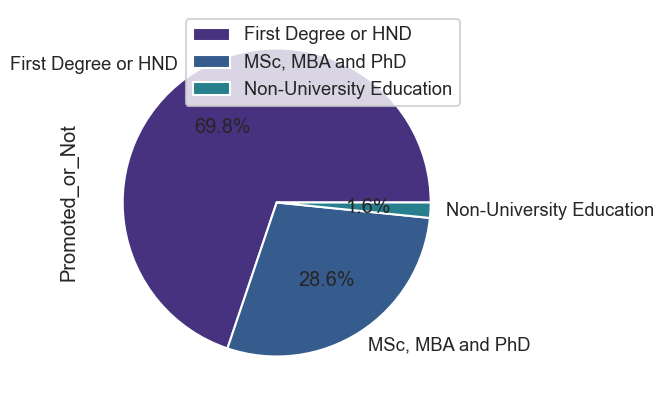

In [23]:
#to see a distribution of the employees by their qualification
#using a pie chart
df_qualification = dataset.groupby(['Qualification']).count()['Promoted_or_Not']
df_qualification.plot.pie(y='Promoted_or_not', figsize = (5,5), autopct = '%1.1f%%')
plt.legend(loc = 1)
plt.show()

#### Encoding categorical variables into 0's and 1's for better interpretability by the algorithm

In [25]:
#importing and defining the LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
dataset['Qualification'] = le.fit_transform(dataset['Qualification'])

In [27]:
dataset.head() #we can see that the qualification column has changed to 0's and 1's

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,1,Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,0,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,0,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,0,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,0,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [28]:
dataset['Qualification'].value_counts()

Qualification
0    25578
1    10469
3     1679
2      586
Name: count, dtype: int64

In [29]:
print('The percentage of promoted employees is {:.1f}% and Non-Promoted employees is {:.1f}%'.format(
dataset[dataset['Promoted_or_Not'] == 1].shape[0]/dataset.shape[0] * 100, #percentage of employees who got promoted, 
dataset[dataset['Promoted_or_Not'] == 0].shape[0]/dataset.shape[0] * 100)) #percentage of employees who did not get promoted

The percentage of promoted employees is 8.5% and Non-Promoted employees is 91.5%


+ Imbalanced class problem: This could lead to issues as we have a wide gap between promoted and non promoted employees as our model could potentially skew towards Non-promoted employees

In [31]:
dataset.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,1,Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,0,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,0,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,0,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,0,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [32]:
#encoding other string columns 
dataset['Gender'] = le.fit_transform(dataset['Gender'])

dataset['Channel_of_Recruitment'] = le.fit_transform(dataset['Channel_of_Recruitment'])

dataset['Foreign_schooled'] = le.fit_transform(dataset['Foreign_schooled'])

dataset['Marital_Status'] = le.fit_transform(dataset['Marital_Status'])

dataset['Past_Disciplinary_Action'] = le.fit_transform(dataset['Past_Disciplinary_Action'])

dataset['Previous_IntraDepartmental_Movement'] = le.fit_transform(dataset['Previous_IntraDepartmental_Movement'])

dataset['No_of_previous_employers'] = le.fit_transform(dataset['No_of_previous_employers'])

dataset['State_Of_Origin']=le.fit_transform(dataset['State_Of_Origin'])

dataset['Division'] = le.fit_transform(dataset['Division'])

In [33]:
dataset.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,1,1,0,1,2,1986,12.5,2011,1,0,41,3,0,0,0,0,0,0
1,YAK/S/00002,2,0,1,0,2,1991,12.5,2015,0,0,52,3,1,0,0,0,0,0
2,YAK/S/00003,1,0,1,1,2,1987,7.5,2012,0,0,42,20,1,0,0,0,0,0
3,YAK/S/00004,1,0,1,0,3,1982,2.5,2009,0,0,42,26,1,2,0,0,1,0
4,YAK/S/00006,4,0,1,1,3,1990,7.5,2012,0,0,77,2,1,0,0,0,1,0


In [34]:
#to drop the qualification column
dataset.drop('Qualification', axis = 1, inplace = True)

In [35]:
dataset.head()

,EmployeeNo,Division,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,1,0,1,2,1986,12.5,2011,1,0,41,3,0,0,0,0,0,0
1,YAK/S/00002,2,1,0,2,1991,12.5,2015,0,0,52,3,1,0,0,0,0,0
2,YAK/S/00003,1,1,1,2,1987,7.5,2012,0,0,42,20,1,0,0,0,0,0
3,YAK/S/00004,1,1,0,3,1982,2.5,2009,0,0,42,26,1,2,0,0,1,0
4,YAK/S/00006,4,1,1,3,1990,7.5,2012,0,0,77,2,1,0,0,0,1,0


In [36]:
#drop the Employee No column
dataset.drop('EmployeeNo', axis = 1, inplace = True)

#### Correlation

In [38]:
#because correlation does not work on non-numeric columns, separate numeric columns and do a correlation on them only.
dataset.corr()

,Division,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
Division,1.000000,-0.107572,-0.003205,0.022635,-0.016845,0.027623,-0.004005,0.043780,0.004503,0.487098,-0.000955,-0.003430,-0.003077,-0.004048,0.004342,0.000813,0.015582
Gender,-0.107572,1.000000,0.008076,0.084906,0.012095,-0.023586,0.017644,-0.038382,0.001773,-0.024311,-0.002833,0.016073,-0.004198,0.012799,-0.002715,0.004717,-0.010437
Channel_of_Recruitment,-0.003205,0.008076,1.000000,-0.011279,0.031744,0.025190,0.019725,0.019151,-0.003005,0.009362,0.001632,-0.002931,-0.007216,-0.003240,-0.003799,0.000612,0.006324
Trainings_Attended,0.022635,0.084906,-0.011279,1.000000,0.078710,-0.062042,0.056215,-0.044789,-0.007409,0.041065,0.010643,-0.005108,-0.005751,-0.002260,-0.005871,0.000796,-0.024345
Year_of_birth,-0.016845,0.012095,0.031744,0.078710,1.000000,-0.175572,0.654666,0.025337,0.013627,0.048390,0.000531,-0.001877,-0.004214,-0.000251,0.011412,-0.003117,0.017991
Last_performance_score,0.027623,-0.023586,0.025190,-0.062042,-0.175572,1.000000,-0.190333,0.276350,0.026587,0.057836,0.000386,-0.001923,-0.001908,-0.003065,-0.005478,-0.005428,0.119690
Year_of_recruitment,-0.004005,0.017644,0.019725,0.056215,0.654666,-0.190333,1.000000,0.076910,0.041995,0.037477,0.003785,-0.000253,-0.000715,0.003217,0.004988,-0.003550,0.012287
Targets_met,0.043780,-0.038382,0.019151,-0.044789,0.025337,0.276350,0.076910,1.000000,0.092934,0.077201,0.000604,-0.004294,-0.000251,-0.000264,-0.002965,-0.003308,0.224518
Previous_Award,0.004503,0.001773,-0.003005,-0.007409,0.013627,0.026587,0.041995,0.092934,1.000000,0.072360,0.001590,0.002960,0.000191,-0.001374,-0.009762,0.003887,0.201434
Training_score_average,0.487098,-0.024311,0.009362,0.041065,0.048390,0.057836,0.037477,0.077201,0.072360,1.000000,-0.004252,0.000796,-0.000737,-0.006620,-0.000237,0.008194,0.178448


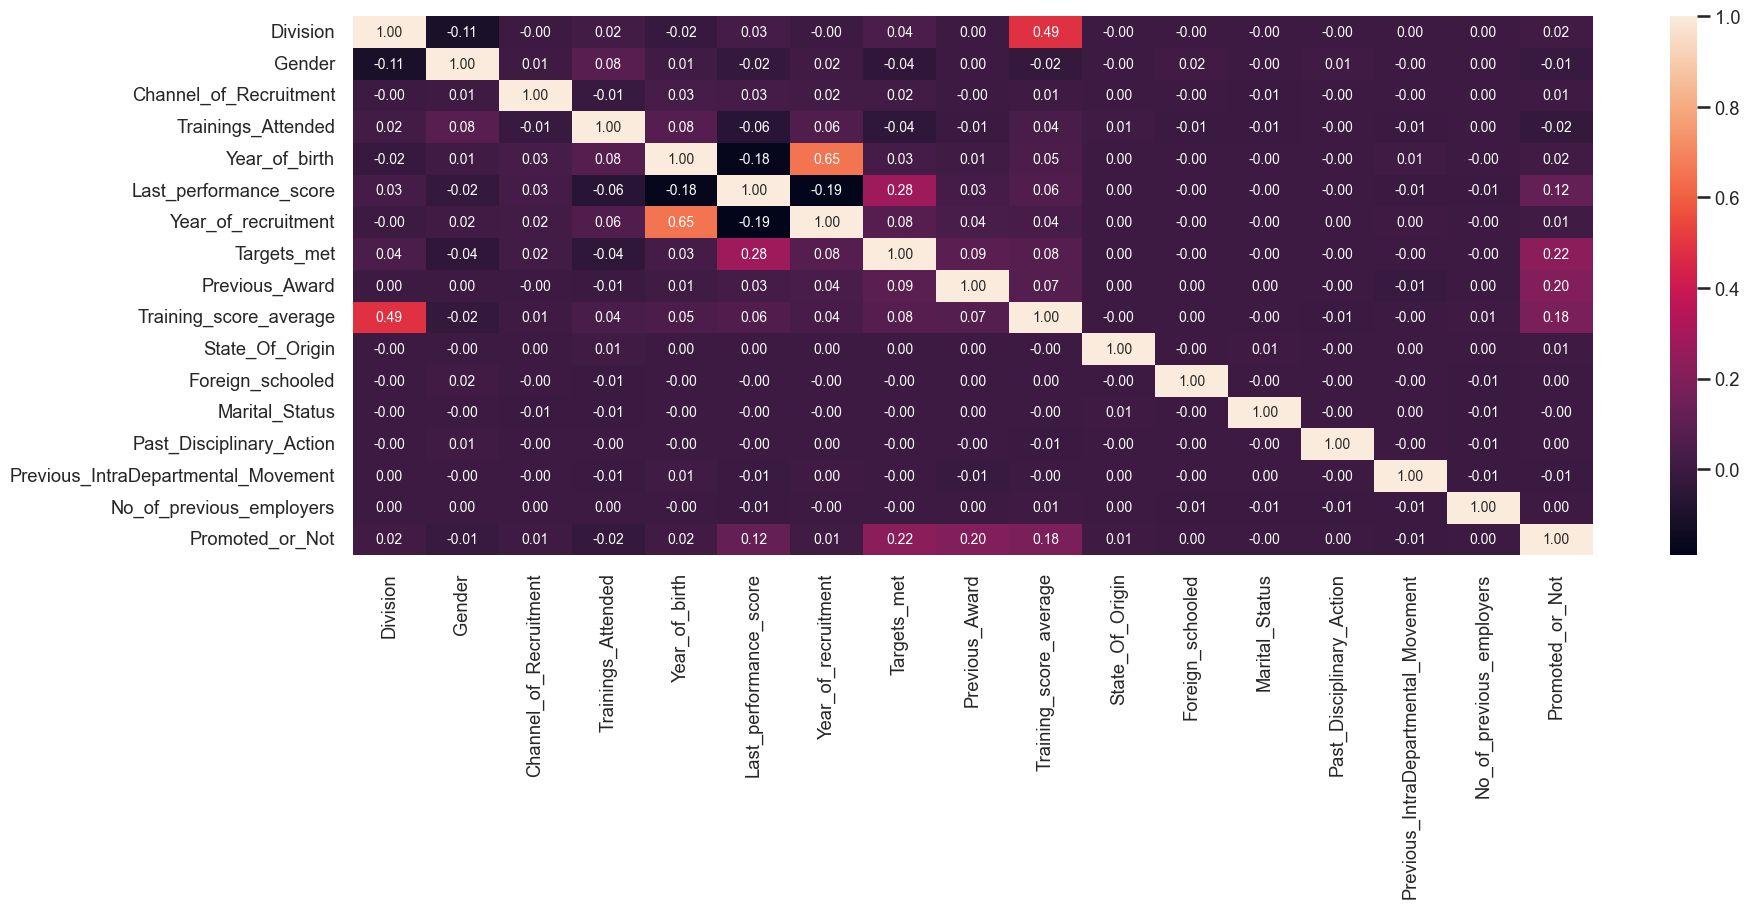

In [39]:
#to view the correlation visually
sns.heatmap(dataset.corr(), annot=True, fmt=".2f", annot_kws={"size": 10})
plt.show()

In [40]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

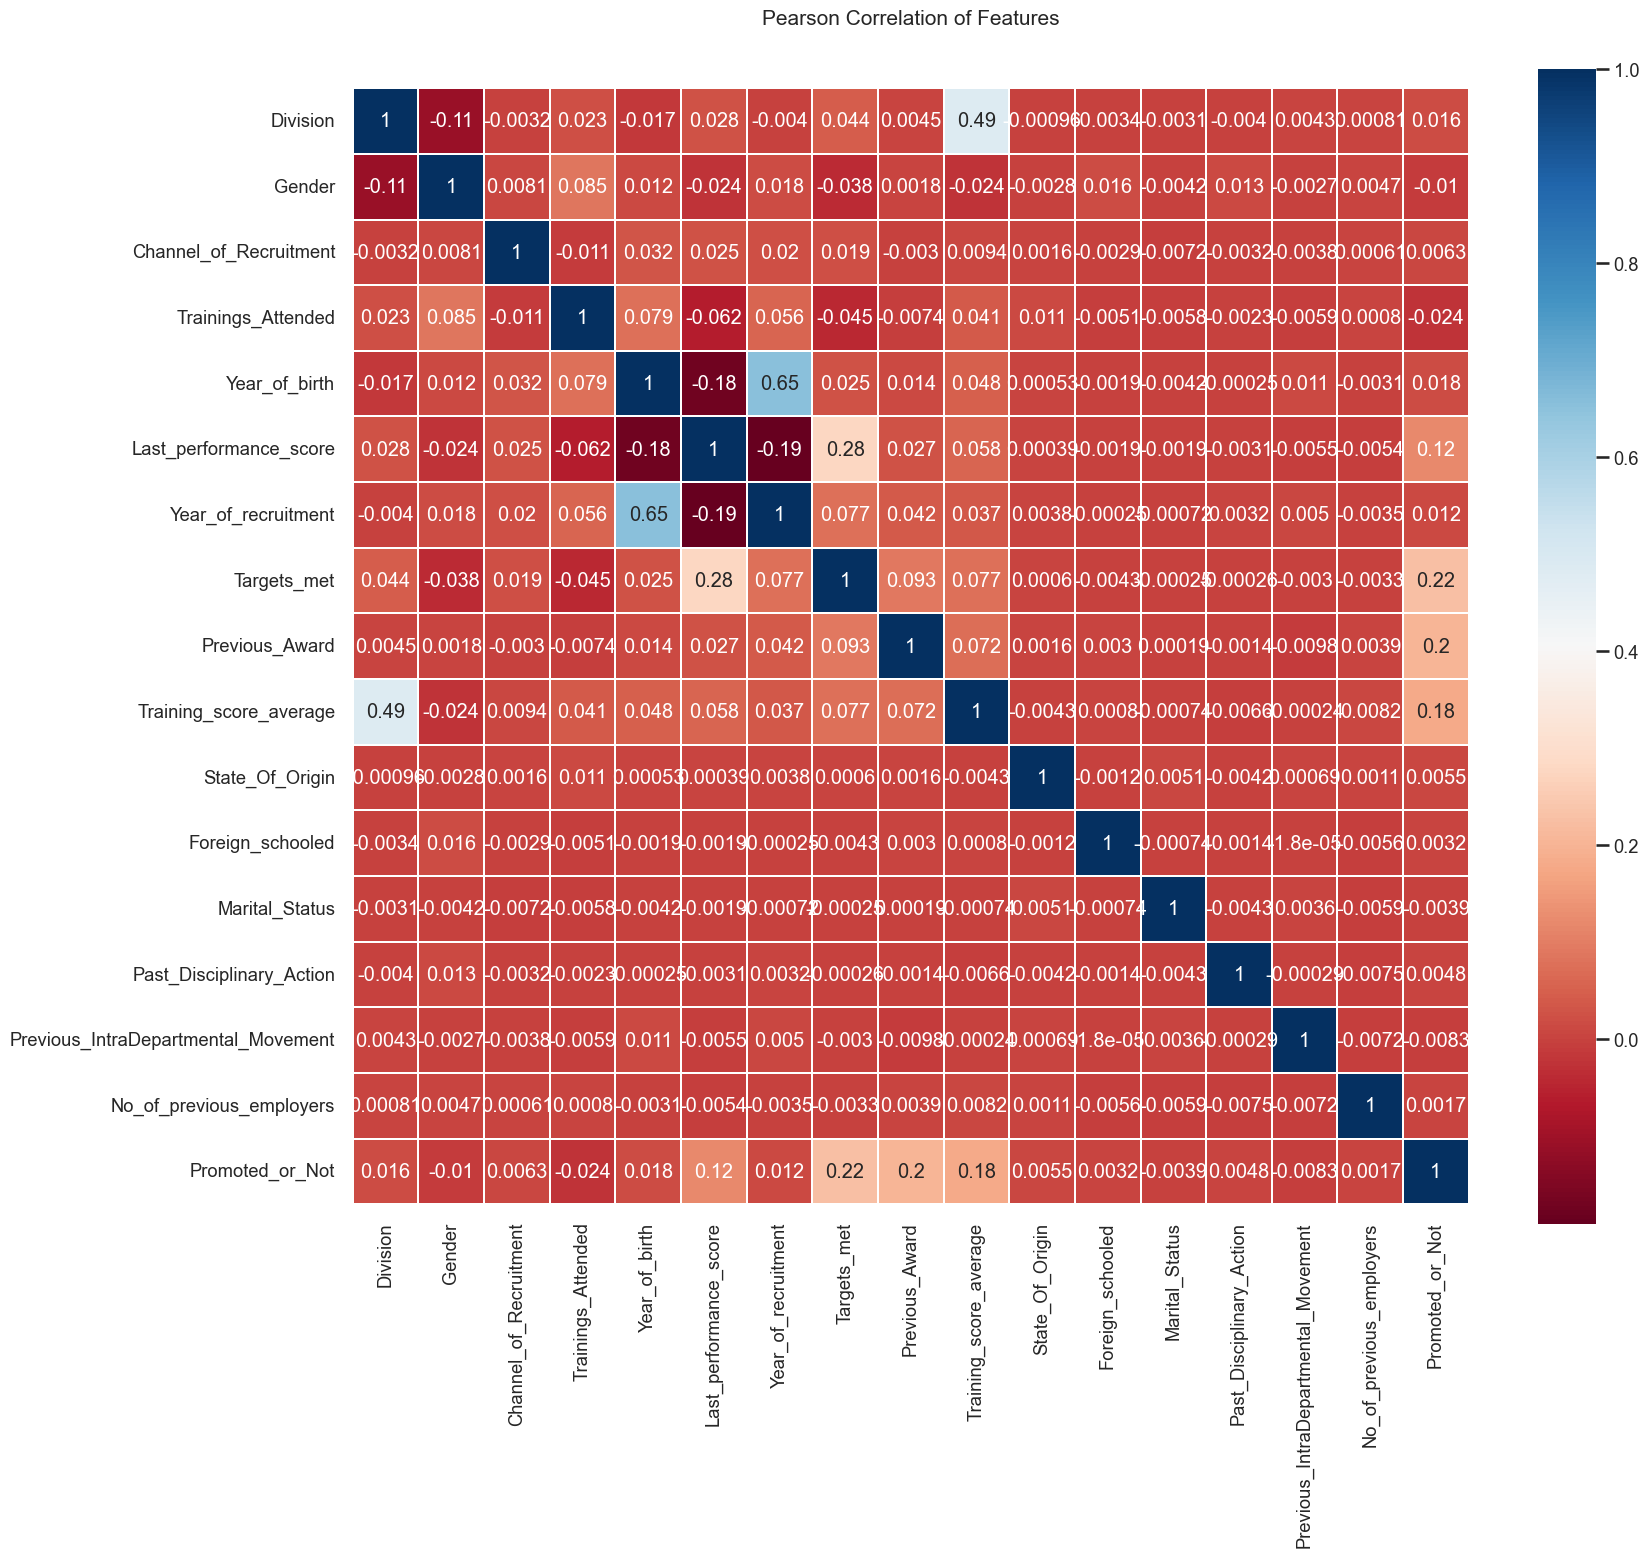

In [41]:
colormap = plt.cm.RdBu
plt.figure(figsize=(18,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dataset.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

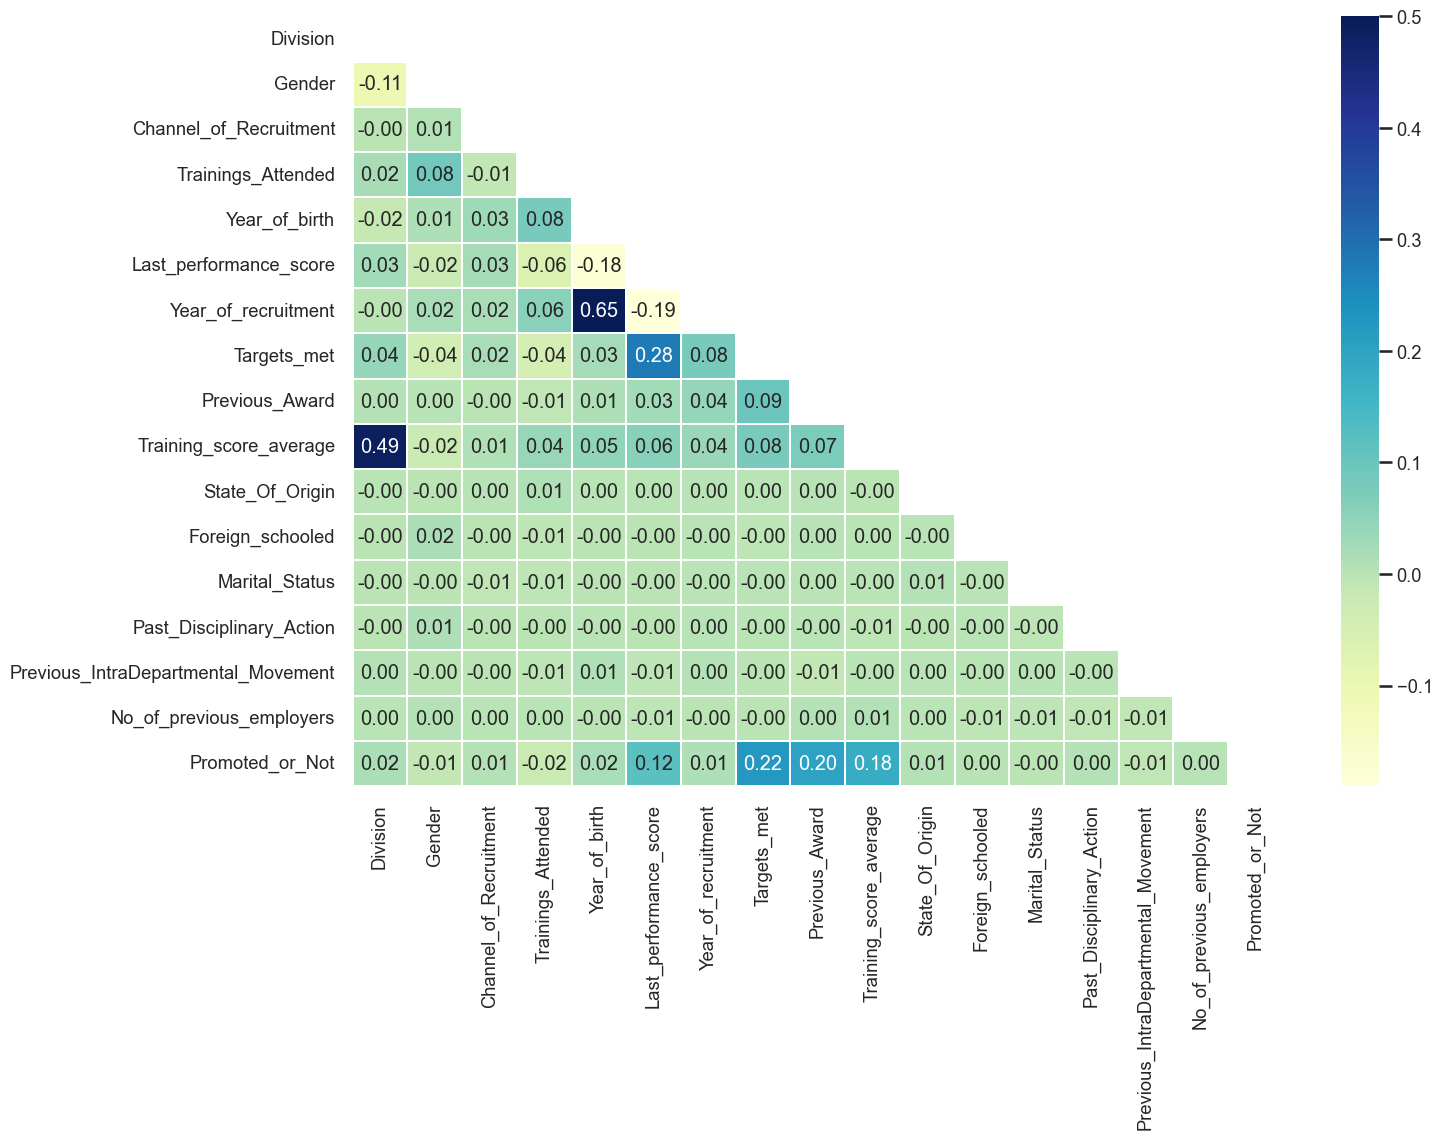

In [42]:
# Calculate correlations
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
             annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")
plt.show()

+ Most of the variables are positively correlated to the'Promoted_or_Not' column

+ Having a heatmap where the upper triangle is cut off/masked helps for the following reasons:
  1. Avoids displaying the same info twice as the upper right and lower left triangles are mirror images of themselves.
  2. It improves readability by making the heatmap look less crowded.
  3. More visually appealing and professional
  4. Faster interpretation by quicker identification of relationships and patterns.

In [45]:
#Display correlations with the target variable and sort the values
correlations = dataset.corr()['Promoted_or_Not'].sort_values(ascending = False)
print('Most positive correlations: \n', correlations.head(5))
print('\nMost negative correlations: \n', correlations.tail(5))

Most positive correlations: 
 Promoted_or_Not           1.000000
Targets_met               0.224518
Previous_Award            0.201434
Training_score_average    0.178448
Last_performance_score    0.119690
Name: Promoted_or_Not, dtype: float64

Most negative correlations: 
 No_of_previous_employers               0.001690
Marital_Status                        -0.003853
Previous_IntraDepartmental_Movement   -0.008289
Gender                                -0.010437
Trainings_Attended                    -0.024345
Name: Promoted_or_Not, dtype: float64


#### **EDA Concluding Remarks**
Let's summarise the findings from this EDA: <br>
- The dataset only features one missing or erroneous data values, with all features in their correct data type. <br>
- The strongest positive correlations with the target features are: **Targets_met**, **Previous_Award**,**Training_score_average**,and **Last_performance_score**. 
- The strongest negative correlations with the target features are: **No_of_previous_employers**, **Marital_Status**, **Previous_IntraDepartmental_Movement**, **Gender**, and **Trainings_Attended**.
- The dataset is **imbalanced** with the majoriy of observations describing **unpromoted employees**. <br>
- Several features (ie columns) are redundant for our analysis, namely: **Qualification**, **EmployeeID**, **Year**, and **Gender**. <br>

### **Feature Selection**

<image src = 'b.jpg'>

In [49]:
#listing out columns in our data
dataset.columns

Index(['Division', 'Gender', 'Channel_of_Recruitment', 'Trainings_Attended',
       'Year_of_birth', 'Last_performance_score', 'Year_of_recruitment',
       'Targets_met', 'Previous_Award', 'Training_score_average',
       'State_Of_Origin', 'Foreign_schooled', 'Marital_Status',
       'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement',
       'No_of_previous_employers', 'Promoted_or_Not'],
      dtype='object')

In [50]:
#define features and target
features = dataset[['Division', 'Gender', 'Channel_of_Recruitment', 'Trainings_Attended',
       'Year_of_birth', 'Last_performance_score', 'Year_of_recruitment',
       'Targets_met', 'Previous_Award', 'Training_score_average',
       'State_Of_Origin', 'Foreign_schooled', 'Marital_Status',
       'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement',
       'No_of_previous_employers']]

target = dataset['Promoted_or_Not']

[0.1023631  0.01639257 0.03354183 0.0281511  0.11876297 0.05755305
 0.09790461 0.04905052 0.04004708 0.22477795 0.12253879 0.01217586
 0.01960384 0.00152362 0.01128362 0.0643295 ]


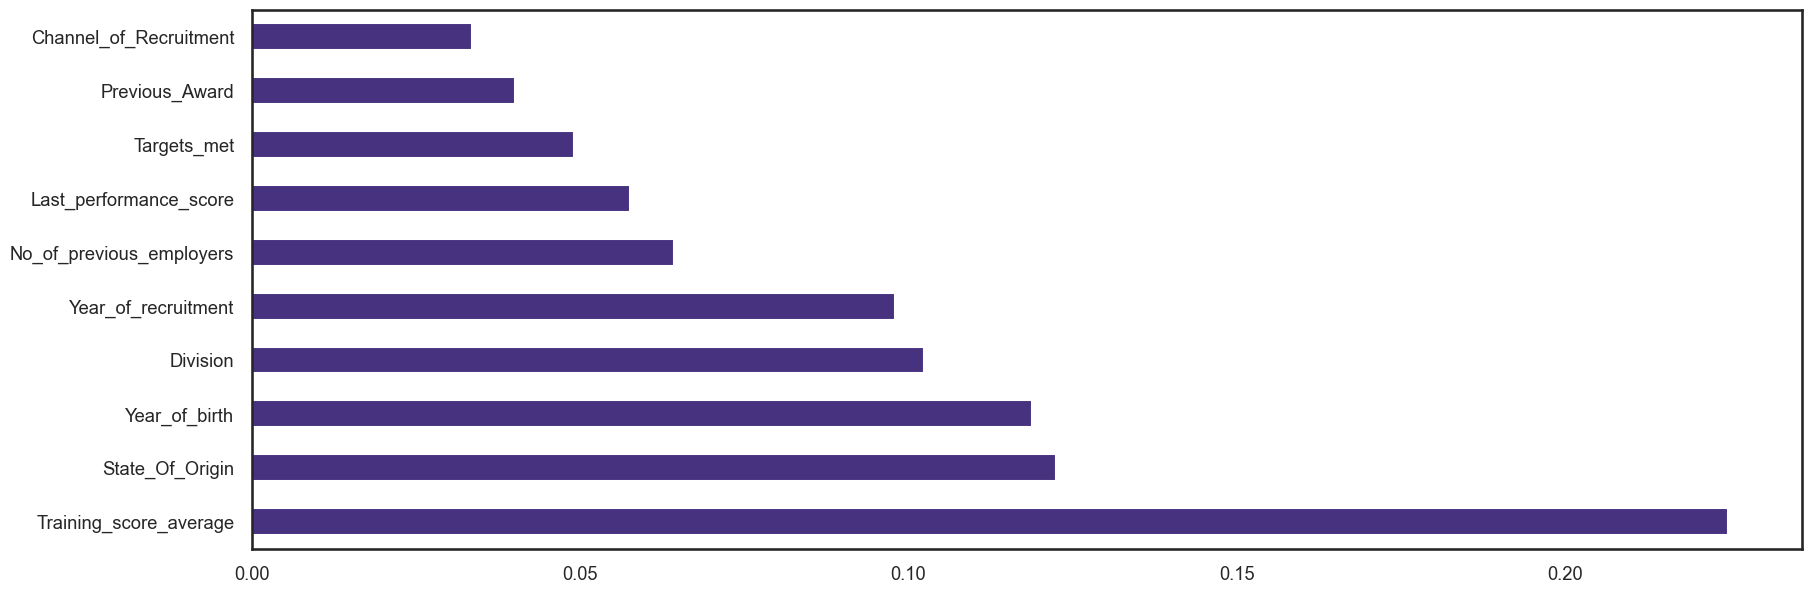

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(features, target)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_, index = features.columns)
feat_importance.nlargest(10).plot(kind = 'barh')
plt.show()

+ This code visualizes the **top 10 most important features**, this help us understand which **features has more influence on the target variable**.
+ This helps greatly with **feature selection**

In [53]:
#setting new features
features = dataset[['Training_score_average','Last_performance_score','Division']]
target = dataset['Promoted_or_Not']

### Splitting data into training and testing sets
+ Prior to implementating or applying any Machine Learning algorithms, we must decouple training and testing datasets from our master dataframe.

In [55]:
#split data into train and test
from sklearn.model_selection import train_test_split

In [56]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [57]:
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((30649, 3), (7663, 3), (30649,), (7663,))

## Building Machine Learning Models
We are going to be building different models with different machine learning algorithms, and them comparing them to see which one works best. We are going to be building our models with the following algorithms.
- Decision Trees Classifier
- Logistic Regression
- Random Forest Classifier
- Support Vector Machine
- Gradient Boosting Classifier


In [60]:
# MY 4-STEP TO A MACHINE LEARNING MODEL: DECLARE, FIT/TRAIN, PREDICT & EVALUATE
#1 DECLARE THE MODEL
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()

In [61]:
#2 FIT/TRAIN THE MODEL
model1 = model1.fit(features_train, target_train)

In [62]:
#3 PREDICT 
predicted = model1.predict(features_test)

In [63]:
#4 EVALUATE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [96]:
#accuracy score
model1_accuracy = accuracy_score(target_test, predicted)
model1_accuracy * 100

94.66266475270781

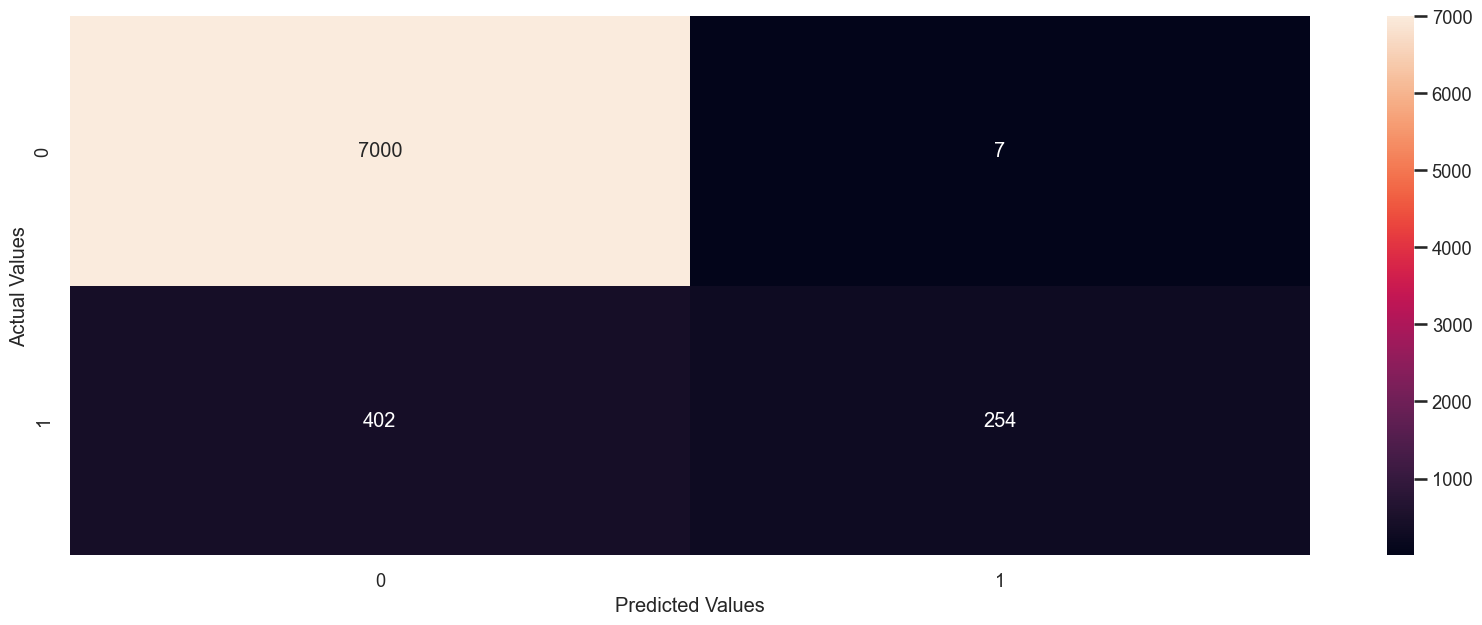

In [65]:
#plot confusion matric in a heatmap
sns.heatmap(confusion_matrix(target_test, predicted), annot = True, fmt = 'd') ### fmt = 'd' lets the values in the heatmap
                                                                               ### show as whole numbers without decimal points
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

**Logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. Logistic Regression is classification algorithm that is not as sophisticated as the ensemble methods or boosted decision trees method discussed below. Hence, it provides us with a good benchmark. 

<img src = 'c.jpg'>

In [67]:
#DECLARE
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [68]:
#FIT/TRAIN
model2 = model2.fit(features_train, target_train)

In [69]:
#PREDICT
predicted2 = model2.predict(features_test)

In [94]:
#EVALUATE
accuracy_score(target_test, predicted2) * 100

91.47853321153595

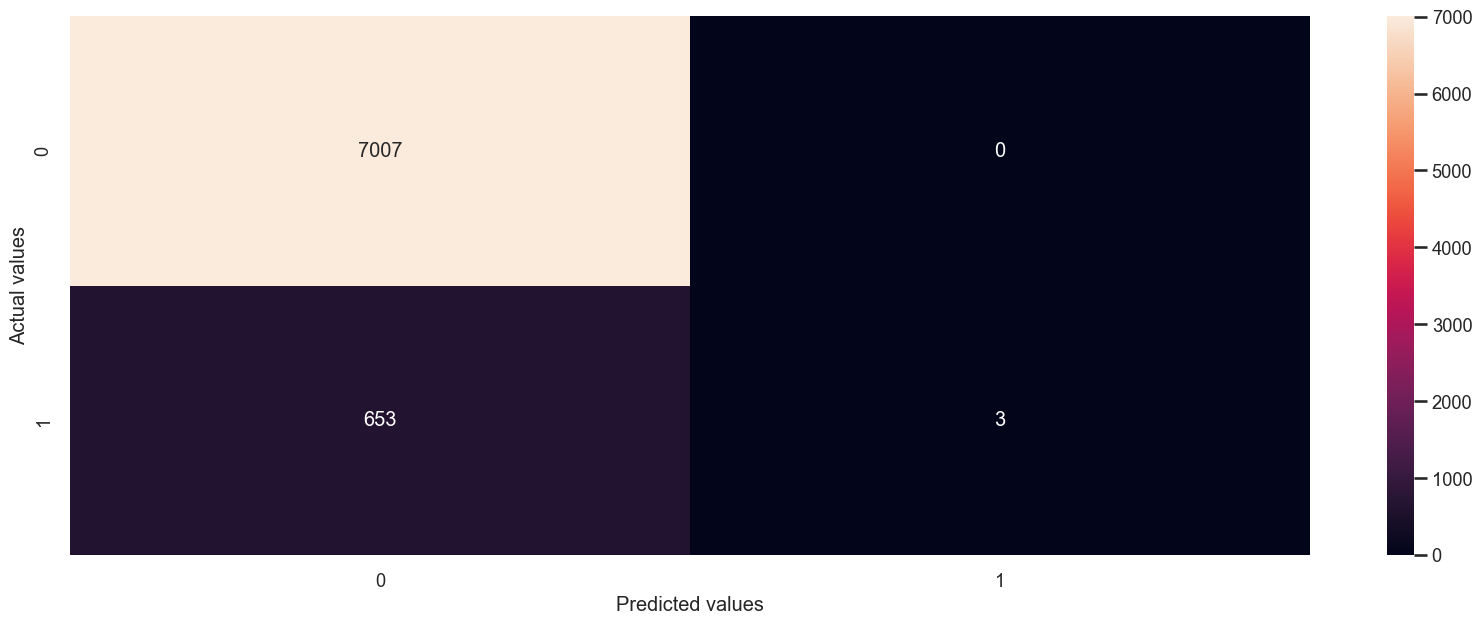

In [71]:
#confusion matrix
sns.heatmap(confusion_matrix(target_test, predicted2), annot = True, fmt = 'd')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

**Random Forest** is a popular and versatile machine learning method that is capable of solving both regression and classification. Random Forest is a brand of Ensemble learning, as it relies on an ensemble of decision trees. It aggregates Classification (or Regression) Trees. A decision tree is composed of a series of decisions that can be used to classify an observation in a dataset.

Random Forest fits a number of decision tree classifiers on various **sub-samples of the dataset** and use **averaging** to improve the predictive accuracy and control over-fitting. Random Forest can handle a large number of features, and is helpful for estimating which of your variables are important in the underlying data being modeled.

In [82]:
#DECLARE
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=200 )

In [84]:
#FIT/TRAIN
model3 = model3.fit(features_train, target_train)

In [86]:
#PREDICT
predicted3 = model3.predict(features_test)

In [92]:
#EVALUATE
model3_accuracy = accuracy_score(target_test, predicted3)
model3_accuracy * 100

94.63656531384575

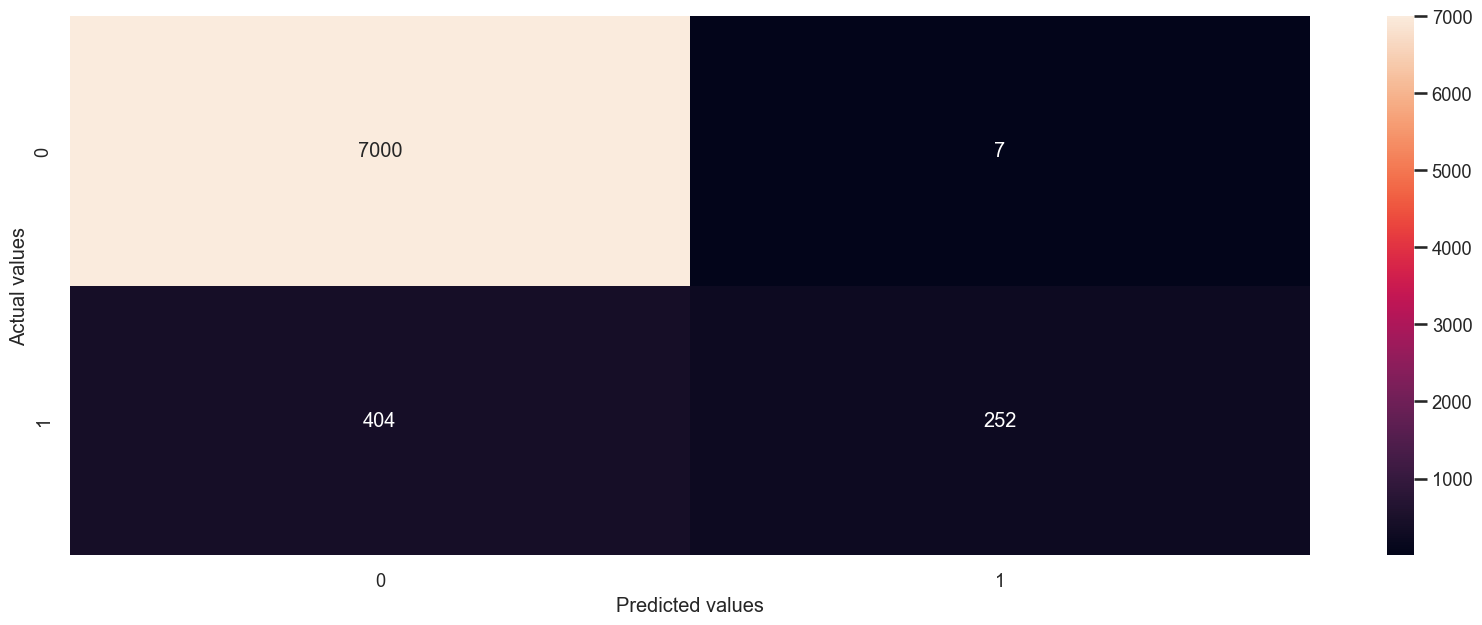

In [90]:
sns.heatmap(confusion_matrix(target_test, predicted3), annot = True, fmt = 'd')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [101]:
#DECLARE
from sklearn.svm import SVC
model4 = SVC()

In [103]:
#FIT/TRAIN
model4 = model4.fit(features_train, target_train)

In [109]:
#PREDICT
predicted4 = model4.predict(features_test)

In [111]:
#EVALUATE
model4_accuracy = accuracy_score(target_test, predicted4)
model4_accuracy * 100

91.43938405324286

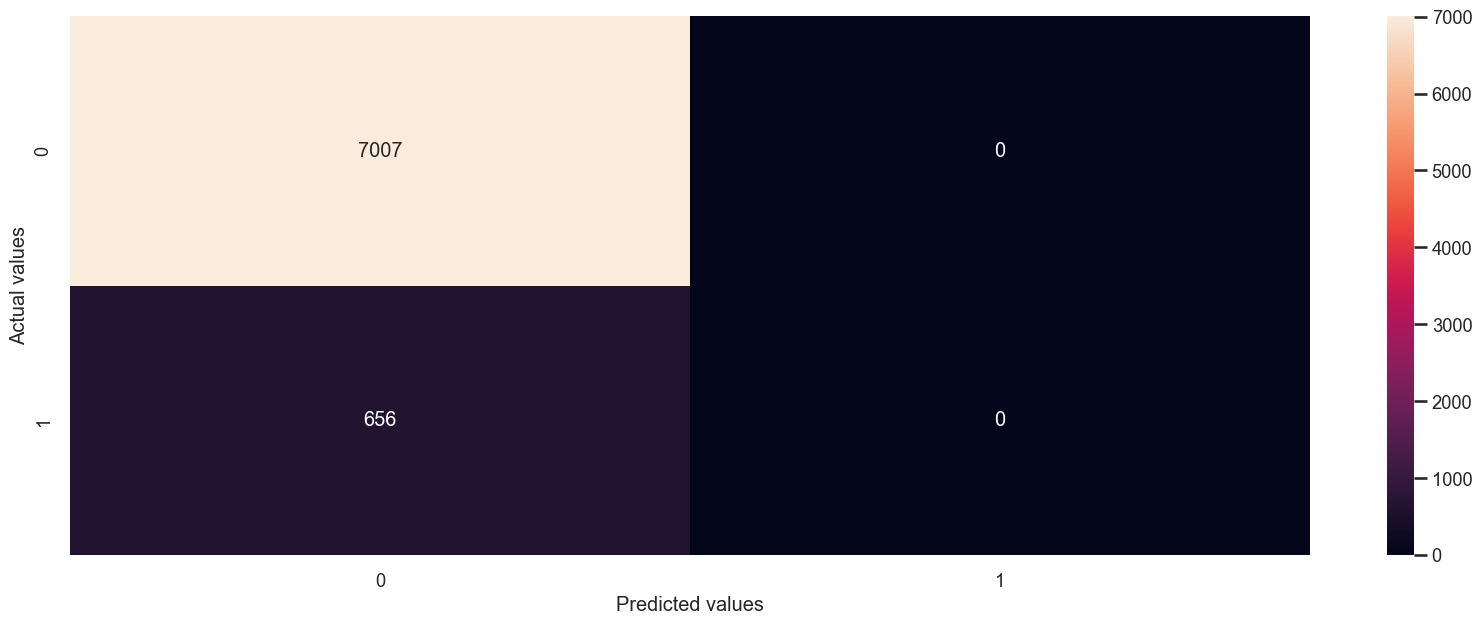

In [113]:
#confusion matrix
sns.heatmap(confusion_matrix(target_test, predicted4), annot = True, fmt = 'd')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

**Gradient Boosting algorithm**

In [116]:
#DECLARE
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier()

In [118]:
#FIT/TRAIN
model5 = model5.fit(features_train, target_train)

In [120]:
#PREDICT
predicted5 = model5.predict(features_test)

In [122]:
#EVALUATE
model5_accuracy = accuracy_score(target_test,predicted5)
model5_accuracy * 100

94.59741615555266

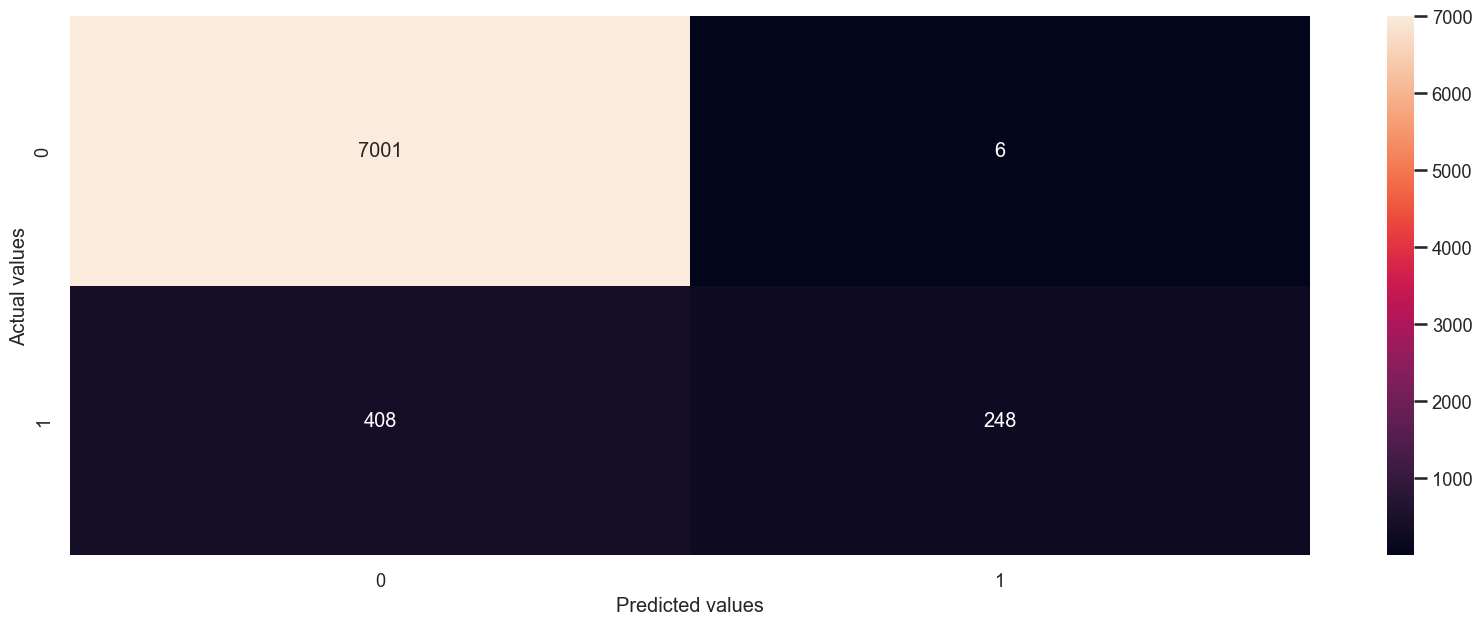

In [124]:
# confusion_matrix
sns.heatmap(confusion_matrix(target_test, predicted5), annot = True, fmt = 'd')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

#### Concluding Remarks

+ Based on our analysis so far, we can present YAKUB TRADING GROUP  our model which is capable of predicting the employees in the company that is likely to be promoted with over 94% accuracy based on the following variables.
Training_score_average, Last_performance_score, Previous_Award, Targets_met.
